## CIFAR Using CNN 

#### Ahmad Pouramini, Benyamin Hosseini 

---



This is the implementatin of CIFAR using CNN.

Source: https://blog.plon.io/tutorials/cifar-10-classification-using-keras-tutorial/

Other Sources: https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/

Question PDF: https://drive.google.com/open?id=1sySPwALk8alK38ejbjCoN5fS_YSHaBPs


## Loading Data

Found GPU at:/device:GPU:0


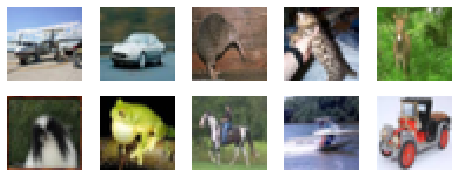

In [17]:
# Import all modules
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
# from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

# GPU Processing
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at:{}'.format(device_name))

batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 #
# epochs = 100 # repeat 100 times

(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)
# x_train - training data(images), y_train - labels(digits)

# Print figure with 10 random images from each
 
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
#   ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


## Data Normalization

In [0]:
# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
#y_valid = np_utils.to_categorical(y_valid, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_valid = x_valid.astype('float32')
x_train  /= 255
x_test /= 255
#x_valid /= 255

# Creating the base model 1:
##ReLU Activation Function

In [0]:
# Based on:
# github.com/abhijeet3922/Object-recognition-CIFAR-10/blob/master/cifar10.py

def base_model_ReLU():  # 3 Convolutional layers + 1 hidden layer MLP
    model = Sequential()
   
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))  # first layer filters: 32 filters 3x3
    #model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), activation='relu'))  # second layer filters: 32 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # second layer pooling: max pooling 2x2

    model.add(Conv2D(64, (3, 3), activation='relu'))  # third layer filters: 64 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # third layer pooling: max pooling 2x2

    # MLP
    model.add(Flatten())
    #model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu',kernel_constraint=maxnorm(3)))  # MLP first hidden layer neurons
    #model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))  # MLP output layer neurons
    
    epochs = 10 
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, decay=decay, momentum=0.9, nesterov=False)  # Stochastic Gradient Descent optimizer

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Creating the base model 2:
##Sigmoid Activation Function

In [0]:
# Based on:
# github.com/abhijeet3922/Object-recognition-CIFAR-10/blob/master/cifar10.py

def base_model_sigmoid():  # 3 Convolutional layers + 1 hidden layer MLP
    model = Sequential()
   
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='sigmoid'))  # first layer filters: 32 filters 3x3
    #model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), activation='sigmoid'))  # second layer filters: 32 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # second layer pooling: max pooling 2x2

    model.add(Conv2D(64, (3, 3), activation='sigmoid'))  # third layer filters: 64 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # third layer pooling: max pooling 2x2

    # MLP
    model.add(Flatten())
    #model.add(Dropout(0.2))
    model.add(Dense(512, activation='sigmoid',kernel_constraint=maxnorm(3)))  # MLP first hidden layer neurons
    #model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))  # MLP output layer neurons
    
    epochs = 10 
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, decay=decay, momentum=0.9, nesterov=False)  # Stochastic Gradient Descent optimizer

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Creating the base model 3:
##Tanh Activation Function

In [0]:
# Based on:
# github.com/abhijeet3922/Object-recognition-CIFAR-10/blob/master/cifar10.py

def base_model_tanh():  # 3 Convolutional layers + 1 hidden layer MLP
    model = Sequential()
   
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='tanh'))  # first layer filters: 32 filters 3x3
    #model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), activation='tanh'))  # second layer filters: 32 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # second layer pooling: max pooling 2x2

    model.add(Conv2D(64, (3, 3), activation='tanh'))  # third layer filters: 64 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # third layer pooling: max pooling 2x2

    # MLP
    model.add(Flatten())
    #model.add(Dropout(0.2))
    model.add(Dense(512, activation='tanh',kernel_constraint=maxnorm(3)))  # MLP first hidden layer neurons
    #model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))  # MLP output layer neurons
    
    epochs = 10 
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, decay=decay, momentum=0.9, nesterov=False)  # Stochastic Gradient Descent optimizer

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## The model summary

In [22]:
cnn_n1 = base_model_ReLU()
cnn_n1.summary()

cnn_n2 = base_model_sigmoid()
cnn_n2.summary()

cnn_n3 = base_model_tanh()
cnn_n3.summary()
# visualize model

# from keras_ascii_sequential import sequential_model_to_ascii_printout 

# sequential_model_to_ascii_printout(cnn_n)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 30, 30)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 13, 13)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 64, 6, 6)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1180160   
__________

## Training the Model

In [23]:
epochs = 10
cnn1 = cnn_n1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 373us/step - loss: 1.3098 - acc: 0.5309 - val_loss: 1.0249 - val_acc: 0.6365
Epoch 2/10
50000/50000 [==============================] - 18s 365us/step - loss: 0.8864 - acc: 0.6903 - val_loss: 0.8582 - val_acc: 0.6994
Epoch 3/10
50000/50000 [==============================] - 18s 353us/step - loss: 0.7107 - acc: 0.7520 - val_loss: 0.8117 - val_acc: 0.7184
Epoch 4/10
50000/50000 [==============================] - 17s 337us/step - loss: 0.5886 - acc: 0.7944 - val_loss: 0.7590 - val_acc: 0.7395
Epoch 5/10
50000/50000 [==============================] - 17s 339us/step - loss: 0.4739 - acc: 0.8350 - val_loss: 0.7854 - val_acc: 0.7451
Epoch 6/10
50000/50000 [==============================] - 17s 338us/step - loss: 0.3790 - acc: 0.8669 - val_loss: 0.8461 - val_acc: 0.7411
Epoch 7/10
50000/50000 [==============================] - 17s 338us/step - loss: 0.3082 - acc: 0.8906 - val_loss: 0.

In [24]:
cnn2 = cnn_n2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 18s 359us/step - loss: 2.1145 - acc: 0.2128 - val_loss: 1.8871 - val_acc: 0.3012
Epoch 2/10
50000/50000 [==============================] - 18s 351us/step - loss: 1.7272 - acc: 0.3671 - val_loss: 1.5333 - val_acc: 0.4413
Epoch 3/10
50000/50000 [==============================] - 18s 351us/step - loss: 1.4459 - acc: 0.4835 - val_loss: 1.3935 - val_acc: 0.4985
Epoch 4/10
50000/50000 [==============================] - 17s 346us/step - loss: 1.3115 - acc: 0.5310 - val_loss: 1.3008 - val_acc: 0.5338
Epoch 5/10
50000/50000 [==============================] - 18s 351us/step - loss: 1.2129 - acc: 0.5683 - val_loss: 1.2525 - val_acc: 0.5538
Epoch 6/10
50000/50000 [==============================] - 18s 354us/step - loss: 1.1371 - acc: 0.5972 - val_loss: 1.2160 - val_acc: 0.5650
Epoch 7/10
50000/50000 [==============================] - 18s 352us/step - loss: 1.0700 - acc: 0.6213 - val_loss: 1.

In [25]:
cnn3 = cnn_n3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 382us/step - loss: 1.3351 - acc: 0.5320 - val_loss: 1.1201 - val_acc: 0.6118
Epoch 2/10
50000/50000 [==============================] - 19s 375us/step - loss: 1.0429 - acc: 0.6399 - val_loss: 0.9801 - val_acc: 0.6702
Epoch 3/10
50000/50000 [==============================] - 19s 376us/step - loss: 0.8820 - acc: 0.6939 - val_loss: 0.9726 - val_acc: 0.6698
Epoch 4/10
50000/50000 [==============================] - 19s 374us/step - loss: 0.7460 - acc: 0.7409 - val_loss: 0.8722 - val_acc: 0.6999
Epoch 5/10
50000/50000 [==============================] - 19s 375us/step - loss: 0.6232 - acc: 0.7826 - val_loss: 0.8721 - val_acc: 0.7039
Epoch 6/10
50000/50000 [==============================] - 19s 374us/step - loss: 0.5026 - acc: 0.8267 - val_loss: 0.9342 - val_acc: 0.6976
Epoch 7/10
50000/50000 [==============================] - 19s 371us/step - loss: 0.4009 - acc: 0.8610 - val_loss: 0.

## Saving Model

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

save_path = "gdrive/My Drive/cifar/models/cnn1.h5"
cnn_n.save(save_path)
print('done saving model at',save_path)

## Loading back the saved model

https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

In [0]:
del cnn # deletes the existing model

from keras.models import load_model

# returns a compiled model
# identical to the previous one
cnn = load_model(save_path)

cnn.summary()

## Results

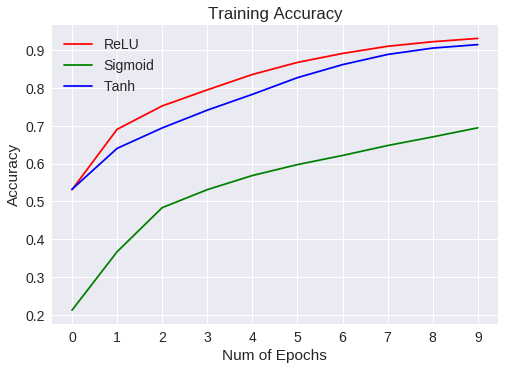

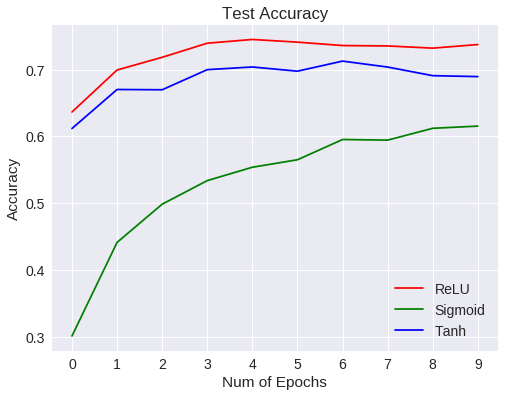

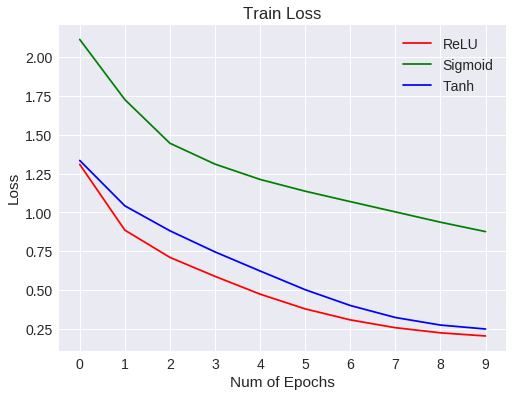

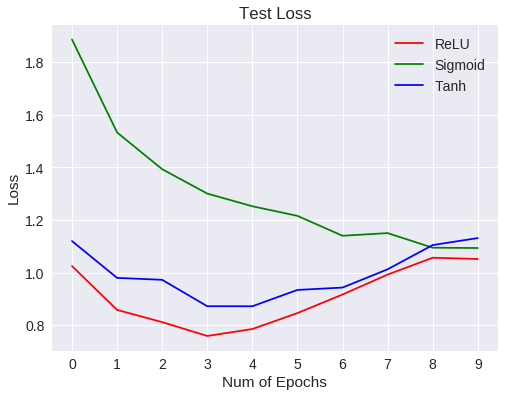

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[759  13  50  23  12  10  15  12  73  33]
 [ 15 868   1   9   6   0  13   2  10  76]
 [ 61   9 582  70  58  83  80  37  11   9]
 [ 15  13  41 515  37 210  98  46  11  14]
 [ 25   2  53  82 630  46  71  78   6   7]
 [  6  10  23 145  28 694  36  46   6   6]
 [  3   8  21  38  18  22 878   3   5   4]
 [  7   5  20  34  44  66  11 801   3   9]
 [ 50  38  12  16   5   6  12   6 832  23]
 [ 18  79   7  19   4   7  11  14  25 816]]


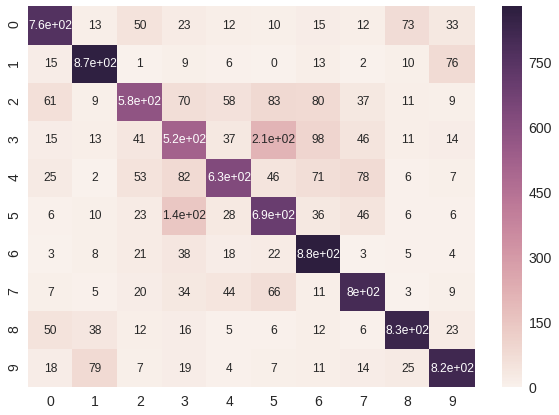

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[682  28  73  22   6  17  42  10  99  21]
 [ 30 764  19  19   4  21  31  11  46  55]
 [ 56  11 603  57  36  83 108  20  21   5]
 [ 12  10 116 423  23 241 136  27   8   4]
 [ 38   8 218  73 371  56 157  61  17   1]
 [  7   4  94 176  22 586  59  37   9   6]
 [  1   6  72  51  16  28 808   6   8   4]
 [ 21   9  75  44  48 117  19 658   3   6]
 [ 83  61  25  28   2  21  18  10 729  23]
 [ 55 189  29  32   3  32  51  34  45 530]]


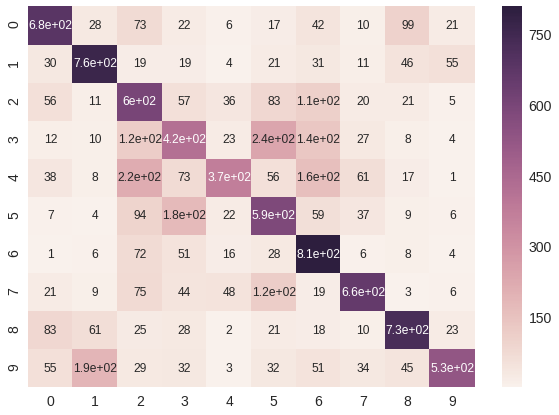

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[790  32  51  21   7  18  13  12  27  29]
 [ 24 867   8   8   3   5   7   5  14  59]
 [ 81   8 574  81  70  74  60  32   8  12]
 [ 30  20  64 524  36 190  61  48  10  17]
 [ 29  11  80  90 602  61  49  62  14   2]
 [ 13   8  66 185  37 600  30  52   4   5]
 [ 10  10  48  73  23  34 779  14   5   4]
 [ 16  16  40  39  46  83  10 723   2  25]
 [125  82  32  18   4   6   7   3 692  31]
 [ 41 138  14  12   1   8   6  13  23 744]]


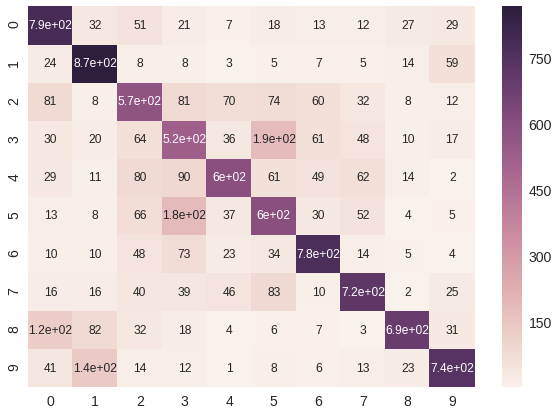

In [26]:
plt.figure(0)
plt.plot(cnn1.history['acc'],'r')
plt.plot(cnn2.history['acc'],'g')
plt.plot(cnn3.history['acc'],'b')
plt.xticks(np.arange(0, epochs, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend(['ReLU','Sigmoid', 'Tanh'])

plt.figure(1)
plt.plot(cnn1.history['val_acc'],'r')
plt.plot(cnn2.history['val_acc'],'g')
plt.plot(cnn3.history['val_acc'],'b')
plt.xticks(np.arange(0, epochs, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend(['ReLU','Sigmoid', 'Tanh'])

plt.figure(2)
plt.plot(cnn1.history['loss'],'r')
plt.plot(cnn2.history['loss'],'g')
plt.plot(cnn3.history['loss'],'b')
plt.xticks(np.arange(0, epochs, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Train Loss")
plt.legend(['ReLU','Sigmoid', 'Tanh'])

plt.figure(3)
plt.plot(cnn1.history['val_loss'],'r')
plt.plot(cnn2.history['val_loss'],'g')
plt.plot(cnn3.history['val_loss'],'b')
plt.xticks(np.arange(0, epochs, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Test Loss")
plt.legend(['ReLU','Sigmoid', 'Tanh'])
 
plt.show()


# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred1 = cnn_n1.predict(x_test, verbose=2)
y_pred1 = np.argmax(Y_pred1, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred1)[ix].sum())
cm1 = confusion_matrix(np.argmax(y_test,axis=1),y_pred1)
print(cm1)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm1 = pd.DataFrame(cm1, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm1, annot=True,annot_kws={"size": 12})# font size
plt.show()

# Confusion matrix result 2

Y_pred2 = cnn_n2.predict(x_test, verbose=2)
y_pred2 = np.argmax(Y_pred2, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred2)[ix].sum())
cm2 = confusion_matrix(np.argmax(y_test,axis=1),y_pred2)
print(cm2)

# Visualizing of confusion matrix 2

df_cm2 = pd.DataFrame(cm2, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm2, annot=True,annot_kws={"size": 12})# font size
plt.show()

# Confusion matrix result 3

from sklearn.metrics import classification_report, confusion_matrix
Y_pred3 = cnn_n3.predict(x_test, verbose=2)
y_pred3 = np.argmax(Y_pred3, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred3)[ix].sum())
cm3 = confusion_matrix(np.argmax(y_test,axis=1),y_pred3)
print(cm3)

# Visualizing of confusion matrix 3

df_cm3 = pd.DataFrame(cm3, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm3, annot=True,annot_kws={"size": 12})# font size
plt.show()